In [1]:
!pip install graphviz matplotlib scikit-learn
import pandas as pd
import numpy as np

In [2]:
#first step: data collection

!wget https://s3.amazonaws.com/assets.datacamp.com/production/course_3629/fake_or_real_news.csv -O fake_or_real_news.csv
df = pd.read_csv('fake_or_real_news.csv')
df.head()

--2025-02-17 16:49:02--  https://s3.amazonaws.com/assets.datacamp.com/production/course_3629/fake_or_real_news.csv
Resolving s3.amazonaws.com (s3.amazonaws.com)... 16.15.185.198, 54.231.192.136, 54.231.131.120, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|16.15.185.198|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30696129 (29M) [text/csv]
Saving to: ‘fake_or_real_news.csv’

fake_or_real_news.c 100%[===================>]  29.27M  70.5MB/s    in 0.4s    

2025-02-17 16:49:02 (70.5 MB/s) - ‘fake_or_real_news.csv’ saved [30696129/30696129]



,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [3]:
df[['label']].describe()
#this is very well distributed - 3171 of the news are classified as real and the rest is fake

,label
count,6335
unique,2
top,REAL
freq,3171


In [6]:
#second step: data representation using CountVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

#creating a series to store the labels: y
y = df.label

#creating the training set and the test set
X_train, X_test, y_train, y_test = train_test_split(df['text'], y,
    test_size=0.33, random_state=53) #33% of our dataset is separated for testing

#initializing a CountVectorizer object: count_vectorizer
count_vectorizer = CountVectorizer(stop_words='english')

#transforming the training data using only the 'text' column values: count_train
count_train = count_vectorizer.fit_transform(X_train)

#transforming the test data using only the 'text' column values: count_test
count_test = count_vectorizer.transform(X_test)

#printing the first 10 features of the count_vectorizer
print(count_vectorizer.get_feature_names_out()[:10])

#print("Treino: ", count_train.toarray().shape)
#print("Tester: ", count_test.toarray().shape)

['00' '000' '0000' '00000031' '000035' '00006' '0001' '0001pt' '000ft'
 '000km']


In [7]:
#data representation using TFIDFVectorizer

from sklearn.feature_extraction.text import TfidfVectorizer

#initializing a TfidfVectorizer object: tfidf_vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

#transforming the training data: tfidf_train
tfidf_train = tfidf_vectorizer.fit_transform(X_train)

#transforming the test data: tfidf_test
tfidf_test = tfidf_vectorizer.transform(X_test)

#printing the first 10 features
print(tfidf_vectorizer.get_feature_names_out()[:10])

#printing the first 5 vectors of the tfidf training data
print(tfidf_train.A[:5])

#print("Treino: ", tfidf_train.toarray().shape)
#print("Tento: ", tfidf_test.toarray().shape)

['00' '000' '0000' '00000031' '000035' '00006' '0001' '0001pt' '000ft'
 '000km']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [8]:
#third step: checking how our representation turned out

#creating the CountVectorizer DataFrame: count_df
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names_out())

#creating the TfidfVectorizer DataFrame: tfidf_df
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names_out())

#printing the head of count_df
print("count_df:")
print(count_df.head())
print()

#printing the head of tfidf_df
print("tfidf_df:")
print(tfidf_df.head())

#calculating the difference in columns: difference
difference = set(count_df.columns) - set(tfidf_df.columns)
print(difference)

#checking whether the DataFrames are equal
print()
print("Os DataFrames são iguais? ", count_df.equals(tfidf_df))

# print()
# print("# features count: ", count_df.columns.size)
# print("# features tfidf: ", tfidf_df.columns.size)

count_df:
   00  000  0000  00000031  000035  00006  0001  0001pt  000ft  000km  ...  \
0   0    0     0         0       0      0     0       0      0      0  ...   
1   0    0     0         0       0      0     0       0      0      0  ...   
2   0    0     0         0       0      0     0       0      0      0  ...   
3   0    0     0         0       0      0     0       0      0      0  ...   
4   0    0     0         0       0      0     0       0      0      0  ...   

   حلب  عربي  عن  لم  ما  محاولات  من  هذا  والمرضى  ยงade  
0    0     0   0   0   0        0   0    0        0      0  
1    0     0   0   0   0        0   0    0        0      0  
2    0     0   0   0   0        0   0    0        0      0  
3    0     0   0   0   0        0   0    0        0      0  
4    0     0   0   0   0        0   0    0        0      0  

[5 rows x 56922 columns]

tfidf_df:
    00  000  0000  00000031  000035  00006  0001  0001pt  000ft  000km  ...  \
0  0.0  0.0   0.0       0.0     0.0    

In [14]:
#fourth step: machine learning with sci-kit learn using the two different representations built
#first, we create a function to show the results obtained by the classifiers

## Function to plot confusion matrix.
### Ref: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
## matplotlib imports are used to plot confusion matrices for the classifiers

import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import roc_auc_score
import numpy as np

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting 'normalize=True'.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.  # Ensure 'cm' is the confusion matrix, not the matplotlib.cm module
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Observado', fontsize=15)
    plt.xlabel('Previsto', fontsize=15)

Acurácia:  0.893352462936394 

Matrix de confusão
 [[ 865  143]
 [  80 1003]] 

ROC_AUC_Score:  0.9337112884550558 



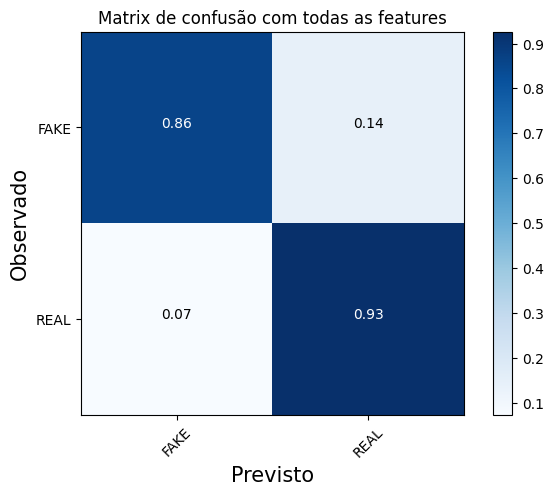

In [19]:
#fifth step: training and testing our fake news detector with CountVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix

#instantiating a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB()

#fitting the classifier to the training data
nb_classifier.fit(count_train, y_train)

#creating the predicted tags: pred
pred = nb_classifier.predict(count_test)

#calculating the accuracy score: score
score = accuracy_score(y_test, pred)
print("Acurácia: ", score, "\n")

#calculating the confusion matrix: cm
cm = confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
print("Matrix de confusão\n", cm, "\n")

plot_confusion_matrix(cm, classes=['FAKE', 'REAL'], normalize=True, title='Matrix de confusão com todas as features')

# Calculate AUC: Area under the curve (AUC) gives an idea about the model efficiency:
# Further information: https://en.wikipedia.org/wiki/Receiver_operating_characteristic
y_pred_prob = nb_classifier.predict_proba(count_test)[:, 1]
print("ROC_AUC_Score: ", roc_auc_score(y_test, y_pred_prob), "\n")

Acurada:  0.8565279770444764 

Matrix de confusão
 [[ 739  269]
 [  31 1052]] 

ROC_AOC_Score:  0.8972311993433877 



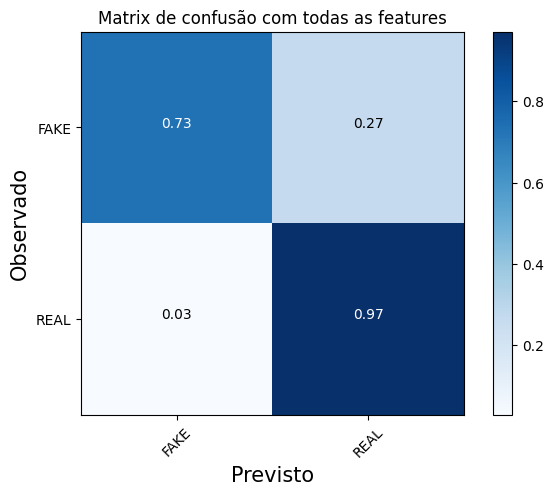

In [20]:
#sixth step: training and testing our fake news detector with TFIDFVectorizer

#creating a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB()

#fitting the classifier to the training data
nb_classifier.fit(tfidf_train, y_train)

#creating the predicted tags: pred
pred = nb_classifier.predict(tfidf_test)

#calculating the accuracy score: score
score = accuracy_score(y_test, pred)
print("Acurada: ", score, "\n")

#calculating the confusion matrix: cm
cm = confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
print("Matrix de confusão\n", cm, "\n")

plot_confusion_matrix(cm, classes=['FAKE', 'REAL'], normalize=True, title='Matrix de confusão com todas as features')

# Calculate AUC: Area under the curve (AUC) gives an idea about the model efficiency:
# Further information: https://en.wikipedia.org/wiki/Receiver_operating_characteristic
y_pred_prob = nb_classifier.predict_proba(count_test)[:, 1]
print("ROC_AOC_Score: ", roc_auc_score(y_test, y_pred_prob), "\n")

In [21]:
#seventh step: adjusting the model's parameters to get to the best results

#creating the list of alphas: alphas
alphas = np.arange(0, 1, 0.1)

#defining train_and_predict()
def train_and_predict(alpha):
    #instantiating the classifier: nb_classifier
    nb_classifier = MultinomialNB(alpha=alpha, force_alpha=True)

    #fitting to the training data
    nb_classifier.fit(tfidf_train, y_train)

    #predicting the labels: pred
    pred = nb_classifier.predict(tfidf_test)

    #computing accuracy: score
    score = accuracy_score(y_test, pred)
    return score

#iterating over the alphas and printimg the corresponding score
for alpha in alphas:
    print('Alpha: ', alpha)
    print('Acurácia: ', train_and_predict(alpha))
    print()

Alpha:  0.0
Acurácia:  0.6150167384026781

Alpha:  0.1
Acurácia:  0.8976566236250598

Alpha:  0.2
Acurácia:  0.8938307030129125

Alpha:  0.30000000000000004
Acurácia:  0.8900047824007652

Alpha:  0.4
Acurácia:  0.8857006217120995

Alpha:  0.5


/usr/local/lib/python3.11/dist-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(


Acurácia:  0.8842659014825442

Alpha:  0.6000000000000001
Acurácia:  0.874701099952176

Alpha:  0.7000000000000001
Acurácia:  0.8703969392635102

Alpha:  0.8
Acurácia:  0.8660927785748446

Alpha:  0.9
Acurácia:  0.8589191774270684



In [24]:
#eighth step: interpreting the model

#ensuring the classifier is fitted
nb_classifier.fit(tfidf_train, y_train)

#getting the class labels: class_labels
class_labels = nb_classifier.classes_

#extracting the features: feature_names
feature_names = tfidf_vectorizer.get_feature_names_out()

#zipping the feature names together with the coefficient array
#and sorting by weights: feat_with_weights
feat_with_weights = sorted(zip(nb_classifier.feature_log_prob_[0], feature_names))

#printing the first class label and the top 20 feat_with_weights entries
print(class_labels[0], feat_with_weights[:20])

#printing the second class label and the bottom 20 feat_with_weights entries
print(class_labels[1], feat_with_weights[-20:])

#this can be useful for understanding which features are most influential in the classification process.

FAKE [(-11.280753302177917, '00000031'), (-11.280753302177917, '00006'), (-11.280753302177917, '000ft'), (-11.280753302177917, '001'), (-11.280753302177917, '002'), (-11.280753302177917, '003'), (-11.280753302177917, '006'), (-11.280753302177917, '008'), (-11.280753302177917, '010'), (-11.280753302177917, '013'), (-11.280753302177917, '025'), (-11.280753302177917, '027'), (-11.280753302177917, '035'), (-11.280753302177917, '037'), (-11.280753302177917, '040'), (-11.280753302177917, '044'), (-11.280753302177917, '048'), (-11.280753302177917, '066'), (-11.280753302177917, '068'), (-11.280753302177917, '075')]
REAL [(-8.036772745824805, 'president'), (-8.022187159522364, 'american'), (-8.013319806154511, 'media'), (-8.007761560290644, 'donald'), (-8.006632122322646, 'october'), (-7.98962322303076, 'government'), (-7.929695447721539, 'like'), (-7.922750601304927, 'war'), (-7.915731838943572, 'new'), (-7.908889774759155, 'world'), (-7.885018054191407, 'just'), (-7.758145325115569, 'said'), 

Acurácia:  0.7527498804399809 

Matriz de confusão
 [[814 194]
 [323 760]] 

|--- feature_44108 <= 0.04
|   |--- feature_42534 <= 0.01
|   |   |--- feature_649 <= 0.00
|   |   |   |--- class: FAKE
|   |   |--- feature_649 >  0.00
|   |   |   |--- class: FAKE
|   |--- feature_42534 >  0.01
|   |   |--- feature_16972 <= 0.07
|   |   |   |--- class: REAL
|   |   |--- feature_16972 >  0.07
|   |   |   |--- class: FAKE
|--- feature_44108 >  0.04
|   |--- feature_35716 <= 0.02
|   |   |--- feature_52298 <= 0.04
|   |   |   |--- class: REAL
|   |   |--- feature_52298 >  0.04
|   |   |   |--- class: FAKE
|   |--- feature_35716 >  0.02
|   |   |--- feature_649 <= 0.01
|   |   |   |--- class: REAL
|   |   |--- feature_649 >  0.01
|   |   |   |--- class: FAKE
 



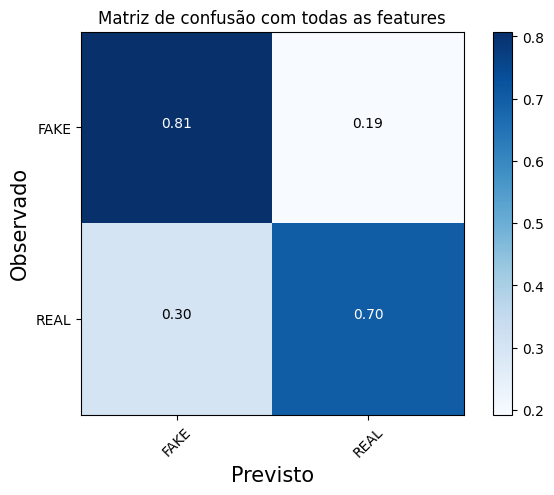

In [25]:
#extra: using a different classifier (decision trees)

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

#instantiating the DecisionTreeClassifier with a maximum depth of 3
dt_classifier = DecisionTreeClassifier(max_depth=3)

#fitting the classifier to the training data
dt_classifier.fit(tfidf_train, y_train)

#creating the predicted tags: pred
pred = dt_classifier.predict(tfidf_test)

#calculating the accuracy score: score
score = accuracy_score(y_test, pred)
print("Acurácia: ", score, "\n")

#calculating the confusion matrix: cm
cm = confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
print("Matriz de confusão\n", cm, "\n")

#plotting the confusion matrix
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'], normalize=True, title='Matriz de confusão com todas as features')

#exporting the decision tree as text
text_representation = tree.export_text(dt_classifier)
print(text_representation, "\n")

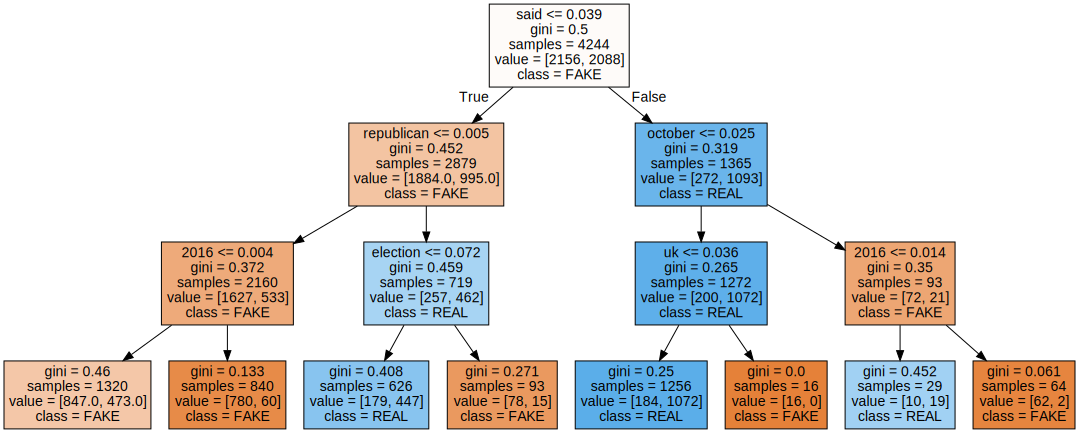

In [27]:
import graphviz

dot_data = tree.export_graphviz(dt_classifier, out_file=None,
                                feature_names=count_vectorizer.get_feature_names_out(),
                                class_names=['FAKE', 'REAL'],
                                filled=True)

graph = graphviz.Source(dot_data, format='png')
graph

#the most important features are on the top of the decision tree